In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [61]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Data Preprocessing

In [62]:
data.shape

(7920, 3)

In [63]:
data.duplicated().sum()

0

In [64]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#### Text preprocessing

In [65]:
import re
import string

In [66]:
#Lowercase to uppercase
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [67]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [68]:
# Remove Links
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [69]:
# Remove Punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [70]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [71]:
# Remove Numbers
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [72]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [73]:
import nltk

In [74]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
with open('../static/model/corpora/stopwords/english', 'rb') as file:
    sw = file.read().splitlines()

In [76]:
sw

[b'i',
 b'me',
 b'my',
 b'myself',
 b'we',
 b'our',
 b'ours',
 b'ourselves',
 b'you',
 b"you're",
 b"you've",
 b"you'll",
 b"you'd",
 b'your',
 b'yours',
 b'yourself',
 b'yourselves',
 b'he',
 b'him',
 b'his',
 b'himself',
 b'she',
 b"she's",
 b'her',
 b'hers',
 b'herself',
 b'it',
 b"it's",
 b'its',
 b'itself',
 b'they',
 b'them',
 b'their',
 b'theirs',
 b'themselves',
 b'what',
 b'which',
 b'who',
 b'whom',
 b'this',
 b'that',
 b"that'll",
 b'these',
 b'those',
 b'am',
 b'is',
 b'are',
 b'was',
 b'were',
 b'be',
 b'been',
 b'being',
 b'have',
 b'has',
 b'had',
 b'having',
 b'do',
 b'does',
 b'did',
 b'doing',
 b'a',
 b'an',
 b'the',
 b'and',
 b'but',
 b'if',
 b'or',
 b'because',
 b'as',
 b'until',
 b'while',
 b'of',
 b'at',
 b'by',
 b'for',
 b'with',
 b'about',
 b'against',
 b'between',
 b'into',
 b'through',
 b'during',
 b'before',
 b'after',
 b'above',
 b'below',
 b'to',
 b'from',
 b'up',
 b'down',
 b'in',
 b'out',
 b'on',
 b'off',
 b'over',
 b'under',
 b'again',
 b'further',
 b'th

In [77]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [78]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally a transparant silicon case thanks to m...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [79]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [80]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [81]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final a transpar silicon case thank to my uncl...
2    we love thi would you go talk makememori unplu...
3    im wire i know im georg i wa made that way iph...
4    what amaz servic appl wont even talk to me abo...
Name: tweet, dtype: object

In [82]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final a transpar silicon case thank to my uncl...
2,3,0,we love thi would you go talk makememori unplu...
3,4,0,im wire i know im georg i wa made that way iph...
4,5,1,what amaz servic appl wont even talk to me abo...
...,...,...,...
7915,7916,0,live out loud lol liveoutloud selfi smile soni...
7916,7917,0,we would like to wish you an amaz day make eve...
7917,7918,0,help my love year old neighbor with her ipad t...
7918,7919,0,final got my smart pocket wifi stay connect an...


Building Vacabulary

In [83]:
from collections import Counter
vocab = Counter()

In [84]:
vocab

Counter()

In [85]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [86]:
len(vocab)

16043

In [87]:
data.shape

(7920, 3)

In [88]:
token = [key for key in vocab if vocab[key] > 10]
token

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'a',
 'case',
 'thank',
 'to',
 'my',
 'yay',
 'soni',
 'xperia',
 's',
 'we',
 'love',
 'thi',
 'would',
 'you',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'i',
 'know',
 'wa',
 'made',
 'that',
 'way',
 'home',
 'what',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'me',
 'about',
 'question',
 'have',
 'pay',
 'them',
 'for',
 'their',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'up',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'again',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'when',
 'make',
 'ipod',
 'dont',
 'it',
 'color',
 'o

In [89]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(token, '../static/model/corpora/vocabulary.txt')    

### Divide Dataset

In [90]:
x = data['tweet']
y = data['label']

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
x_train.shape

(6336,)

In [93]:
x_test.shape

(1584,)

### Vectorization

In [94]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new            

In [95]:
vectorized_x_train = vectorizer(x_train, token)

In [96]:
vectorized_x_test = vectorizer(x_test, token)

In [97]:
y_test

3365    0
7070    0
6955    0
1024    1
67      0
       ..
5384    0
5732    0
732     1
4284    0
4502    0
Name: label, Length: 1584, dtype: int64

In [98]:
y_train.value_counts()

label
0    4708
1    1628
Name: count, dtype: int64

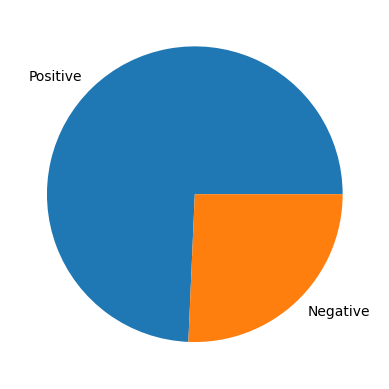

In [99]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle Imbalanced Dataset

In [100]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9416, 1249) (9416,)


In [101]:
y_train_smote.value_counts()

label
0    4708
1    4708
Name: count, dtype: int64

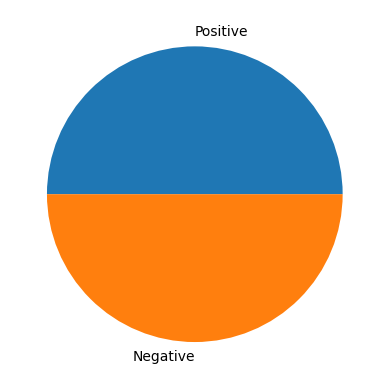

In [102]:
plt.pie(np.array([y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]]), labels=['Positive', 'Negative'])
plt.show()

In [103]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.46222553, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.37699395, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [104]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9411    1
9412    1
9413    1
9414    1
9415    1
Name: label, Length: 9416, dtype: int64

In [105]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [106]:
y_test

3365    0
7070    0
6955    0
1024    1
67      0
       ..
5384    0
5732    0
732     1
4284    0
4502    0
Name: label, Length: 1584, dtype: int64

 Model Training and Evalution

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [108]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [109]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.949
	Precision = 0.925
	Recall = 0.976
	F1-Score = 0.95
Testing Scores:
	Accuracy = 0.874
	Precision = 0.712
	Recall = 0.839
	F1-Score = 0.77


Naive Bayes

In [110]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.864
	Recall = 0.962
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.869
	Precision = 0.668
	Recall = 0.947
	F1-Score = 0.784


Decision Tree

In [111]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.827
	Precision = 0.661
	Recall = 0.641
	F1-Score = 0.651


Random Forest

In [112]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.864
	Precision = 0.745
	Recall = 0.698
	F1-Score = 0.721


Support Vector Machine

In [113]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.986
	Precision = 0.975
	Recall = 0.997
	F1-Score = 0.986
Testing Scores:
	Accuracy = 0.883
	Precision = 0.74
	Recall = 0.822
	F1-Score = 0.779


In [114]:
import pickle

with open('../static/model/corpora/model.pickle', 'wb') as file:
    pickle.dump(lr, file)
    